<a href="https://colab.research.google.com/github/mwahajkhan/exploratory-data-analysis/blob/main/exploratory_data_analysis_notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Introduction:

> Using Iris flower species dataset i.e. iris_data.csv

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

> Loading the data

In [5]:
path = '/content/sample_data/iris_data.csv'

data = pd.read_csv(path)
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Data Shape analysis

Checking:

> the number of data points (rows) **.shape()**

> the column names  **.columns.tolist()**

> the data type for each column **.dtypes()**

In [8]:
#[0] indicates only the number of rows is returned
print(data.shape[0])

#Another way to count number of rows
len(data)

150


150

In [ ]:
#.tlist() to bring names from index form to list
print(data.columns.tolist())

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']


In [ ]:
print(data.dtypes)
data.head()

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Remove "Iris-" from all entries in the dataset

In [11]:
data['species']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [16]:
#The str method maps the following function to each entry as a string

#using the apply function:

data['species'].apply(lambda x: x[5:])



#String processing method, when working with strings
#as column have several methods availaible

data['species'] = data.species.str.replace('Iris-', ' ')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


> Finding the number of each species present .**vale_counts()**

> Finding mean, median and quantiles and ranges(max-min) for each petal and sepal measurement.



In [17]:
data.species.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [18]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# Select just the rows desired from the 'describe' method and add in the 'median'

stats_df = data.describe()

#locate max value and subtract from min value, and pop into range
stats_df.loc['range'] = stats_df.loc['max'] - stats_df.loc['min']

#specifing rows to look at
out_fields = ['mean','25%','50%','75%', 'range']

# .loc[outfields] specifies the only the fields in outfield in output
stats_df = stats_df.loc[out_fields]
stats_df.rename({'50%': 'median'}, inplace=True)
stats_df
### END SOLUTION

,sepal_length,sepal_width,petal_length,petal_width
mean,5.843333,3.054,3.758667,1.198667
25%,5.100000,2.800,1.600000,0.300000
median,5.800000,3.000,4.350000,1.300000
75%,6.400000,3.300,5.100000,1.800000
range,3.600000,2.400,5.900000,2.400000


Calculating in a seperate dataframe:

> finding the mean of each measurement (sepal_length, sepal_width, petal_length, petal_width)

> Median of each of these measurements **bold text**

In [ ]:
# mean calculation

#levaraging groupby() function calculating mean/median specifing species column

data.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [ ]:
# median calculation

data.groupby('species').median()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


In [ ]:
# Applying two functions together

  #by passing a list of recognized strings
data.groupby('species').agg(['mean', 'median'])

sepal_length        sepal_width        petal_length         \
                   mean median        mean median         mean median   
species                                                                 
setosa            5.006    5.0       3.418    3.4        1.464   1.50   
versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
virginica         6.588    6.5       2.974    3.0        5.552   5.55   

           petal_width         
                  mean median  
species                        
setosa           0.244    0.2  
versicolor       1.326    1.3  
virginica        2.026    2.0

In [ ]:
  #passing list of explicit aggregation functions
data.groupby('species').agg([np.mean, np.median])

sepal_length        sepal_width        petal_length         \
                   mean median        mean median         mean median   
species                                                                 
setosa            5.006    5.0       3.418    3.4        1.464   1.50   
versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
virginica         6.588    6.5       2.974    3.0        5.552   5.55   

           petal_width         
                  mean median  
species                        
setosa           0.244    0.2  
versicolor       1.326    1.3  
virginica        2.026    2.0

For mean/median calculation, **if certain fields needs to be aggregated differently**:

> In this method, passing in a dictionary saying for each one of the four fields return: **mean, median, max**

In [24]:
from pprint import pprint

#for each of four columns the key is the dictionary value of mean, and median
#as long as field != 'species', which is product and not numerical column
agg_dict = {field: ['mean', 'median'] for field in data.columns if field != 'species'}
agg_dict

{'sepal_length': ['mean', 'median'],
 'sepal_width': ['mean', 'median'],
 'petal_length': ['mean', 'median'],
 'petal_width': ['mean', 'median']}

In [25]:
# If certain fields need to be aggregated differently, we can do:
#making 'petal_length" a different aggregation i.e. max

agg_dict['petal_length'] = 'max'
agg_dict

{'sepal_length': ['mean', 'median'],
 'sepal_width': ['mean', 'median'],
 'petal_length': 'max',
 'petal_width': ['mean', 'median']}

In [27]:
#pprint is a prettier way to print out data

pprint(agg_dict)

#data.groupby('species') to group by differrent sepecies
#.agg function to pass dictionary that will tell for each feature how to aggregate
data.groupby('species').agg(agg_dict)

{'petal_length': 'max',
 'petal_width': ['mean', 'median'],
 'sepal_length': ['mean', 'median'],
 'sepal_width': ['mean', 'median']}


sepal_length        sepal_width        petal_length petal_width  \
                   mean median        mean median          max        mean   
species                                                                      
setosa            5.006    5.0       3.418    3.4          1.9       0.244   
versicolor        5.936    5.9       2.770    2.8          5.1       1.326   
virginica         6.588    6.5       2.974    3.0          6.9       2.026   

                   
           median  
species            
setosa        0.2  
versicolor    1.3  
virginica     2.0

## *> Scatter Plot of **sepal_length vs sepal_width**

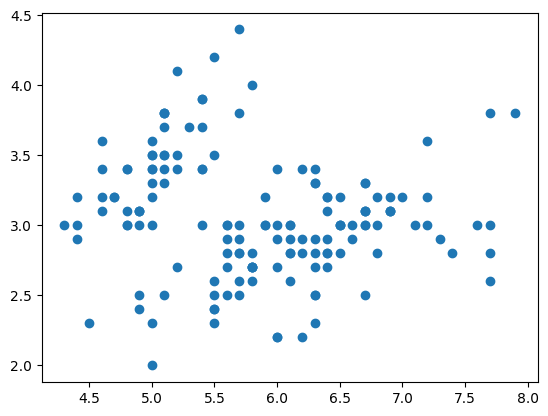

In [ ]:
#magic statement in order for output to show in jupter notebook

%matplotlib inline

#scatter plot with matplot without labels

plt.plot(data.sepal_length,
         data.sepal_width,
         ls=' ', marker='o')

[Text(0.5, 0, 'Sepal Length cm'),
 Text(0, 0.5, 'Sepal Width cm'),
 Text(0.5, 1.0, 'Sepal Length vs Width')]

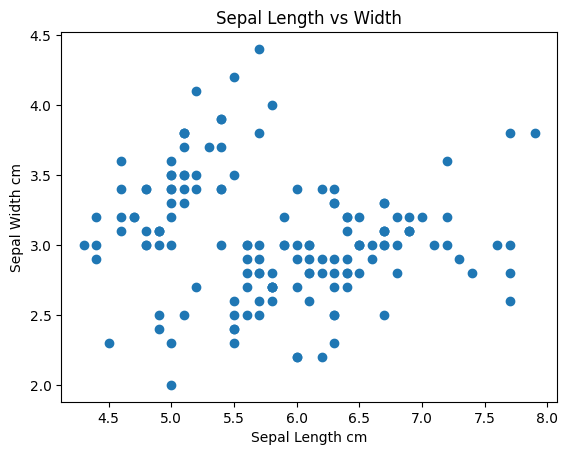

In [ ]:
#Customizable scatter plot


#Setting axes which is graph or initially empty container of our image

ax = plt.axes()

#plot kind with x and y values
ax.scatter(data.sepal_length, data.sepal_width)

#Label the axes

ax.set(xlabel='Sepal Length cm',
       ylabel='Sepal Width cm',
       title='Sepal Length vs Width')



## **> Making a histogram of one of the 4 features in dataset**









[Text(0.5, 0, 'Petal Length (cm)'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Distribution of Petal Lengths')]

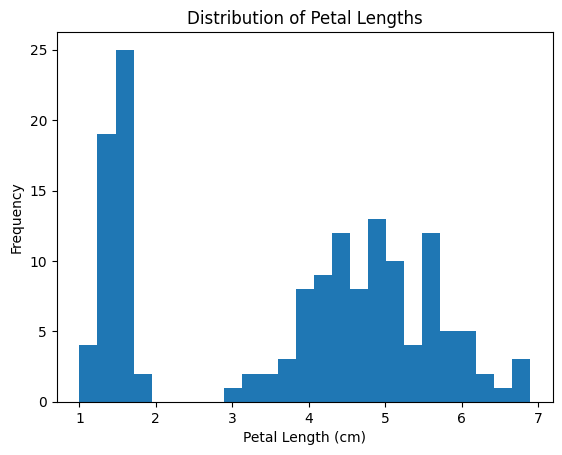

In [ ]:
# Using matplotlib plotting functionality

# Defining bounding box as ax
ax = plt.axes()


ax.hist(data.petal_length, bins=25)

ax.set(xlabel='Petal Length (cm)',
       ylabel='Frequency',
       title='Distribution of Petal Lengths')

> **Another option**

[Text(0.5, 0, 'Peatl length (cm)'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Distribution of Petal Lengths')]

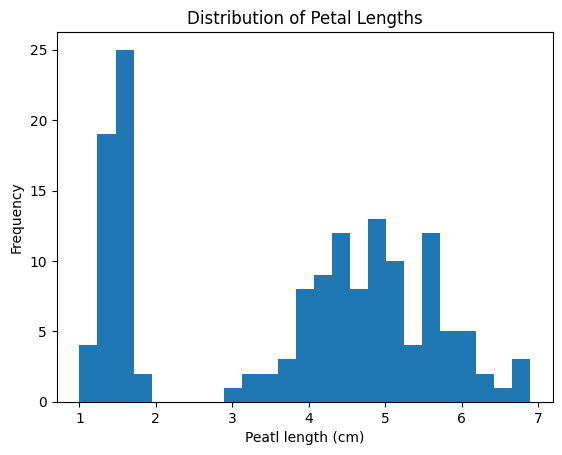

In [ ]:
# Or using pandas plotting functionality
# Calling directly from panda series i.e. petal_length

ax = data.petal_length.plot.hist(bins=25)

ax.set(xlabel='Peatl length (cm)',
       ylabel='Frequency',
       title='Distribution of Petal Lengths')

## Seaborn Plots:

> Creating a single plot with histograms for each one feature, overlayed on top each other: petal_width, petal_length, sepal_width, sepal_length

> 4 individual histogram plots in a single figure, where each plot contains one feature

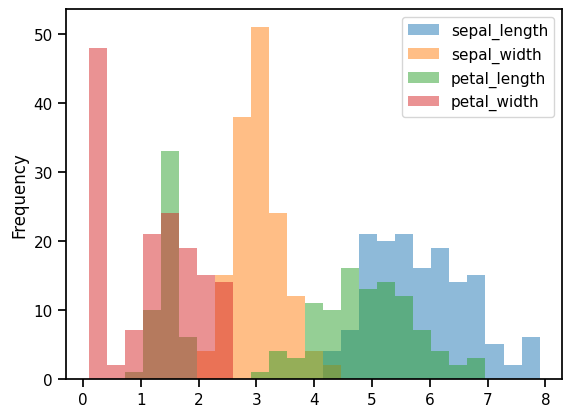

In [ ]:
#importing seaborn in jupyter
sns.set_context('notebook')

#using data.plot to plot full Data frame rather then selecting single feature
#plot.hist gives all 4 histograms overlaid
#alpha=0.5 to make the graphic transparent

ax = data.plot.hist(bins=25, alpha=0.5)
ax.set_label('Size (cm)')


4 individual histogram plots in a single figure, where each plot contains one feature

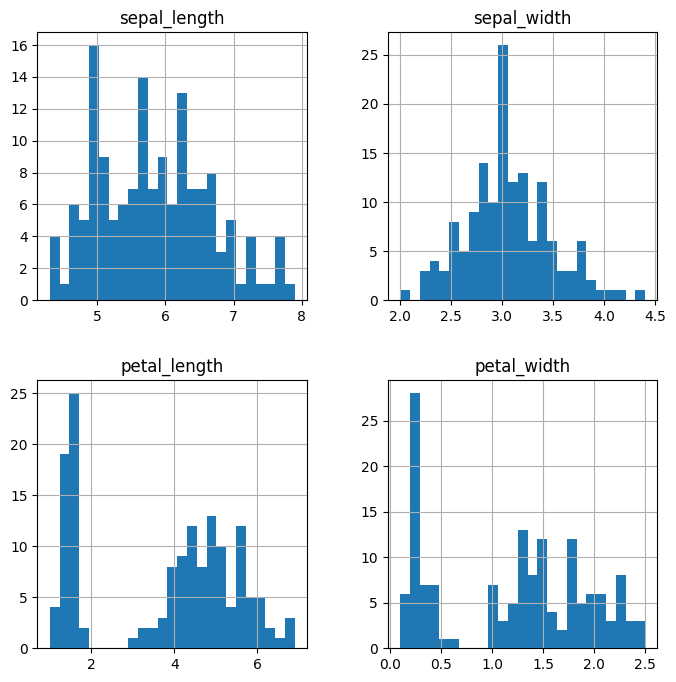

In [28]:
# To create four separate plots, using Pandas `.hist` method

axList = data.hist(bins=25, figsize = (8, 8))

> Creating 4 plots, but with labels

(2, 2)


(4,)

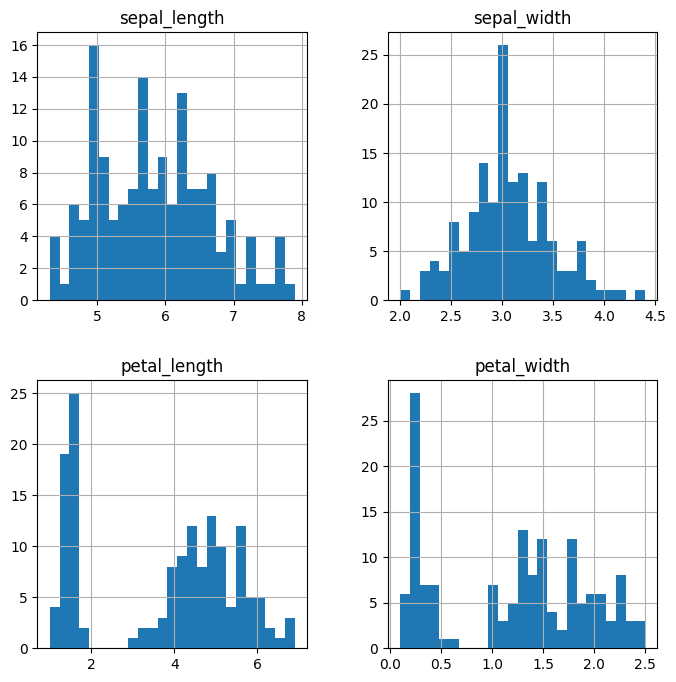

In [34]:
axList = data.hist(bins=25, figsize = (8, 8))
print(axList.shape)
#Currently giving individual graph shape

#for example if falttening the 4 shapes in 1 array

axList.flatten().shape

## > **Making a boxplot for each petal and sepal mesauremnt using pandas**

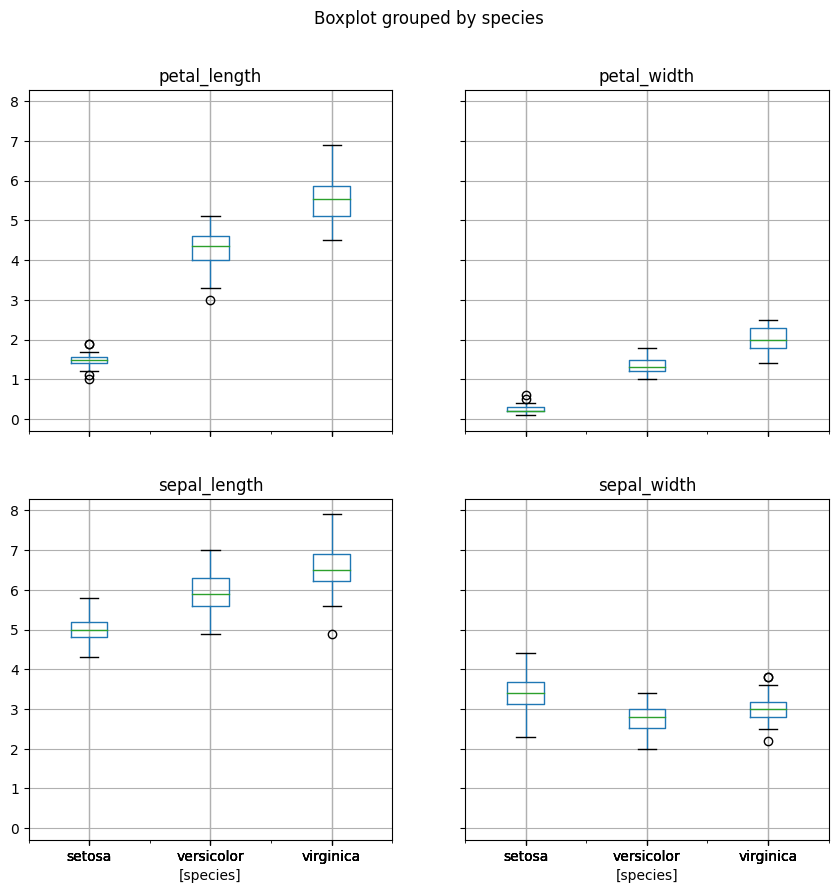

In [44]:
#for 4 seperate solutions

data.boxplot(by = 'species', figsize = (10, 10));

## **Single boxplot where the features are sepearted in the x-axis, and species are colored with differrent hues.**

> As seaborn is picky about format, we changed the input dataframe, so each row contains a single datapoint. Data has to be in long format rather then wide format.

> Transform so each row contains a single data point

> Then plot the new formatted data frame

In [45]:
data.head()         #gives data with 150 rows
# We have to move all the species into one column

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [46]:
data.set_index('species')     #makes the species names the index


,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.1,3.5,1.4,0.2
setosa,4.9,3.0,1.4,0.2
setosa,4.7,3.2,1.3,0.2
setosa,4.6,3.1,1.5,0.2
setosa,5.0,3.6,1.4,0.2
...,...,...,...,...
virginica,6.7,3.0,5.2,2.3
virginica,6.3,2.5,5.0,1.9
virginica,6.5,3.0,5.2,2.0


In [47]:
data.set_index('species').stack().  #Stacks the individual species columms

species                
setosa     sepal_length    5.1
           sepal_width     3.5
           petal_length    1.4
           petal_width     0.2
           sepal_length    4.9
                          ... 
virginica  petal_width     2.3
           sepal_length    5.9
           sepal_width     3.0
           petal_length    5.1
           petal_width     1.8
Length: 600, dtype: float64

In [49]:
#made to data with 600 rows, in long format, with multi level index using .to_frame()

data.set_index('species').stack().to_frame()

0
species                    
setosa    sepal_length  5.1
          sepal_width   3.5
          petal_length  1.4
          petal_width   0.2
          sepal_length  4.9
...                     ...
virginica petal_width   2.3
          sepal_length  5.9
          sepal_width   3.0
          petal_length  5.1
          petal_width   1.8

[600 rows x 1 columns]

In [53]:
#Each row with single data point in long format with .rest_index() so they are no longer in insex

data.set_index('species').stack().to_frame().reset_index()

,species,level_1,0
0,setosa,sepal_length,5.1
1,setosa,sepal_width,3.5
2,setosa,petal_length,1.4
3,setosa,petal_width,0.2
4,setosa,sepal_length,4.9
...,...,...,...
595,virginica,petal_width,2.3
596,virginica,sepal_length,5.9
597,virginica,sepal_width,3.0
598,virginica,petal_length,5.1


In [55]:
#rename the columns with level 0 as size, and level 1 as measurements

data.set_index('species').stack().to_frame().reset_index().rename(columns = {0: 'size', 'level_1': 'measurement'})

,species,measurement,size
0,setosa,sepal_length,5.1
1,setosa,sepal_width,3.5
2,setosa,petal_length,1.4
3,setosa,petal_width,0.2
4,setosa,sepal_length,4.9
...,...,...,...
595,virginica,petal_width,2.3
596,virginica,sepal_length,5.9
597,virginica,sepal_width,3.0
598,virginica,petal_length,5.1


Same code, combined to plot.

In [54]:
# Reshape data so only one single measurement in each column

plot_data = (data
             .set_index('species')
             .stack()
             .to_frame()
             .reset_index()
             .rename(columns={0:'size', 'level_1':'measurement'}))

plot_data.head()

,species,measurement,size
0,setosa,sepal_length,5.1
1,setosa,sepal_width,3.5
2,setosa,petal_length,1.4
3,setosa,petal_width,0.2
4,setosa,sepal_length,4.9


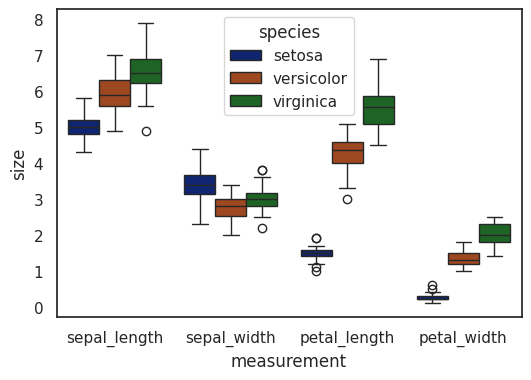

In [ ]:
# Plot the dataframe from above using Seaborn


#Changing the look of the plot
sns.set_style('white')
sns.set_context('notebook')
sns.set_palette('dark')

#set the figure, all the information about actual plot, all the data points are in axes
#hue splits x axes by species
f = plt.figure(figsize=(6, 4))
sns.boxplot(x='measurement', y='size',
            hue='species', data=plot_data);

#Box plot for each one of the different features split up by one of each different species

## **Exploring the correlation between each of the measuremnts using:**

**> Pair Plot**

 Looks at the correlations between each of four features, split by species


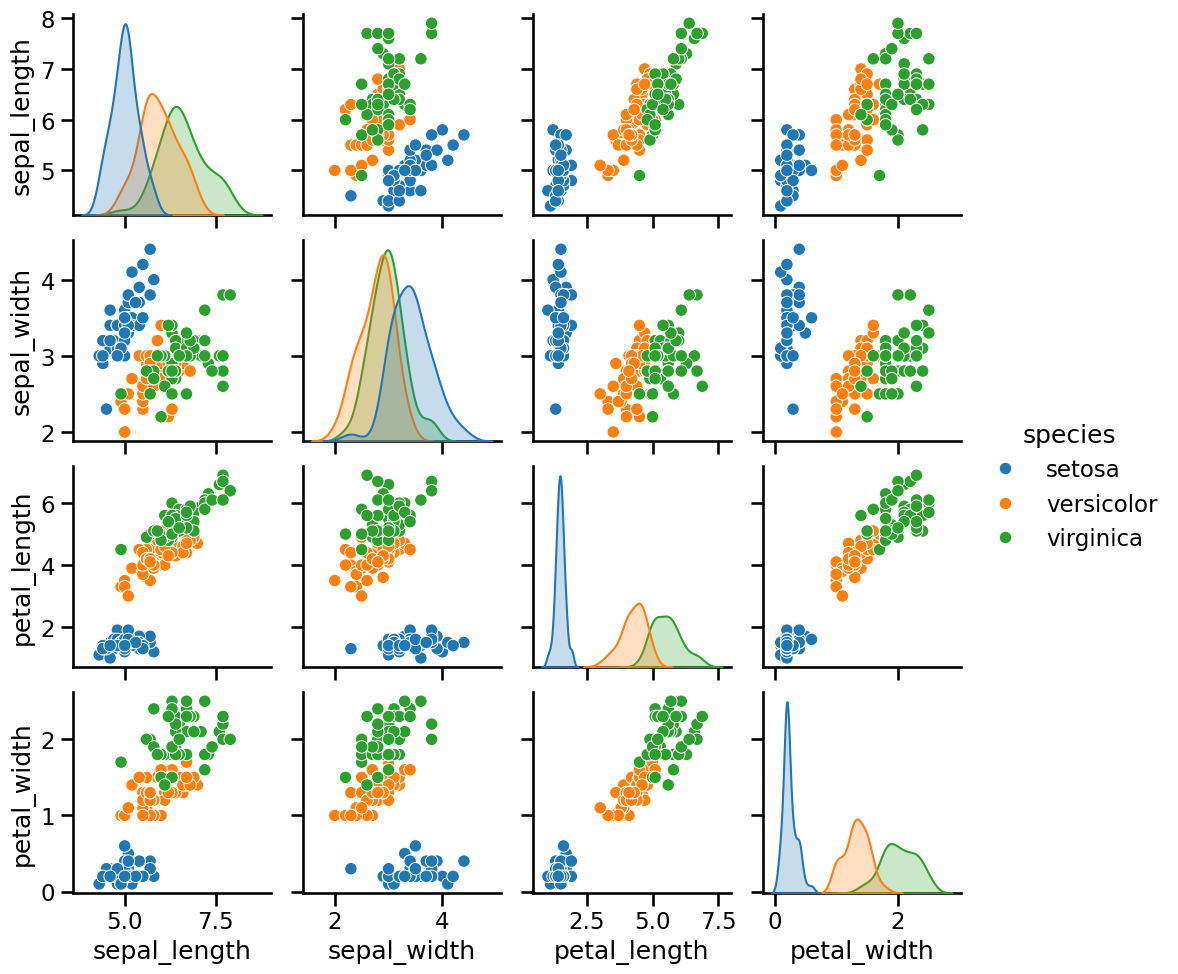

In [57]:
sns.set_context('talk')                            #Magic statement to set up the way we want output plot
plot = sns.pairplot(data, hue='species')       #hue = species means  split by species
plot